# 🎯 İşe Alımda Aday Seçimi: SVM ile Başvuru Değerlendirme

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime, timedelta

In [2]:
def generate_candidate_data(num_candidates=200):
    candidates = []
    
    for i in range(num_candidates):
        # Tecrübe yılı (0-10 arası)
        experience = round(random.uniform(0, 10), 1)
        
        # Teknik puan (0-100 arası)
        technical_score = round(random.uniform(0, 100), 1)
        
        # Etiketleme kriteri
        if experience < 2 and technical_score < 60:
            label = 1  # İşe alınmadı
        else:
            label = 0  # İşe alındı
            
        candidate = {
            'aday_id': i + 1,
            'tecrube_yili': experience,
            'teknik_puan': technical_score,
            'etiket': label,
            'basvuru_tarihi': datetime.now() - timedelta(days=random.randint(1, 365))
        }
        
        candidates.append(candidate)
    
    return pd.DataFrame(candidates)

In [4]:
# fonksiyon ile verinin oluşturulması : 
candidates_df = generate_candidate_data()

# İlk 5 adayı göster
candidates_df.head()

,aday_id,tecrube_yili,teknik_puan,etiket,basvuru_tarihi
0,1,5.3,31.7,0,2024-09-13 16:10:48.681845
1,2,1.8,91.1,0,2024-08-08 16:10:48.681891
2,3,9.8,63.6,0,2025-01-23 16:10:48.681898
3,4,0.8,13.1,1,2025-01-28 16:10:48.681903
4,5,2.0,86.2,0,2025-01-25 16:10:48.681914


In [6]:
candidates_df.to_csv('candidates.csv', index=False)

### 2. Veri İstatistikleri :

In [7]:
print("Veri İstatistikleri:")
print(f"Toplam Aday Sayısı: {len(candidates_df)}")
print(f"İşe Alınan Aday Sayısı: {len(candidates_df[candidates_df['etiket'] == 0])}")
print(f"İşe Alınmayan Aday Sayısı: {len(candidates_df[candidates_df['etiket'] == 1])}")

print("\nTecrübe Yılı İstatistikleri:")
print(candidates_df['tecrube_yili'].describe())

print("\nTeknik Puan İstatistikleri:")
print(candidates_df['teknik_puan'].describe())

Veri İstatistikleri:
Toplam Aday Sayısı: 200
İşe Alınan Aday Sayısı: 171
İşe Alınmayan Aday Sayısı: 29

Tecrübe Yılı İstatistikleri:
count    200.000000
mean       5.046000
std        3.014335
min        0.100000
25%        2.300000
50%        5.250000
75%        7.700000
max       10.000000
Name: tecrube_yili, dtype: float64

Teknik Puan İstatistikleri:
count    200.000000
mean      48.219500
std       28.057974
min        0.100000
25%       25.750000
50%       46.350000
75%       71.400000
max       99.900000
Name: teknik_puan, dtype: float64


### 3. Veri Ön İşleme : 

In [9]:
# Özellikler ve hedef değişkenlerin ayrılması : 
X = candidates_df[['tecrube_yili', 'teknik_puan']]
y = candidates_df['etiket']

In [10]:
# Veriyi eğitim ve test olarak ayırılması : 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Veriyi ölçeklendirme : 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
print("Eğitim seti boyutu:", X_train_scaled.shape)
print("Test seti boyutu:", X_test_scaled.shape)

Eğitim seti boyutu: (160, 2)
Test seti boyutu: (40, 2)


### 4. Model Eğitimi : 

In [13]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

print("Model eğitimi tamamlandı.")

Model eğitimi tamamlandı.


### 5. Model Değerlendirilmesi :

In [14]:
# Tahmin
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9250


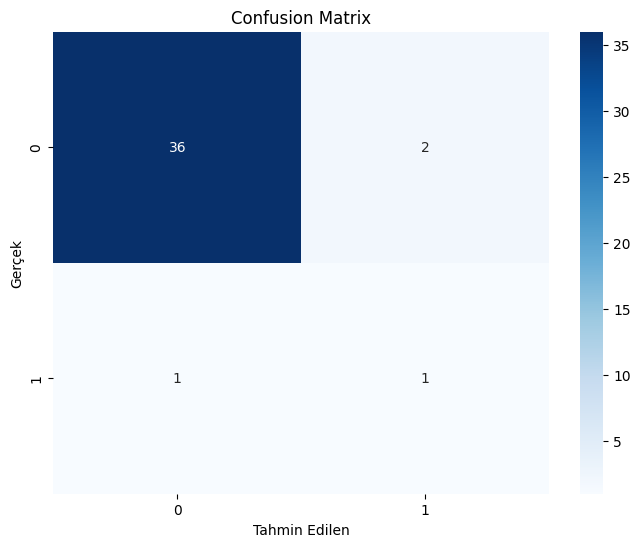

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()

In [16]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        38
           1       0.33      0.50      0.40         2

    accuracy                           0.93        40
   macro avg       0.65      0.72      0.68        40
weighted avg       0.94      0.93      0.93        40



### 6. Karar Sınırı Görselleştirilmesi : 

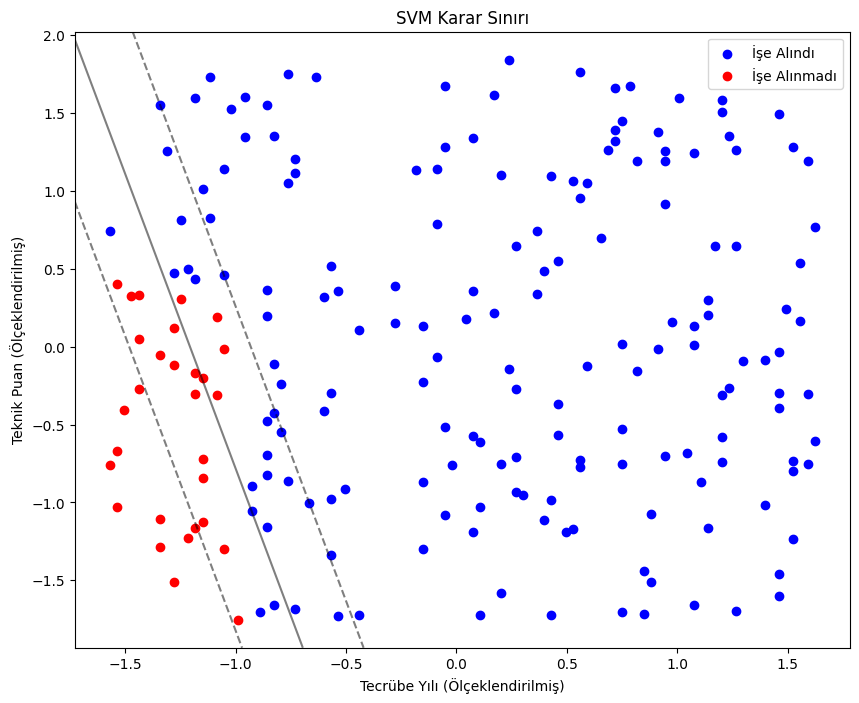

In [17]:
# Veriyi ölçeklendirme :
X_scaled = scaler.transform(X)

# Karar sınırının çizilmesi :
plt.figure(figsize=(10, 8))

# Veri noktalarının çizilmesi :
plt.scatter(X_scaled[y == 0][:, 0], X_scaled[y == 0][:, 1], 
            color='blue', label='İşe Alındı')
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], 
            color='red', label='İşe Alınmadı')

# Karar sınırının çizilmesi : 
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], 
           alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Tecrübe Yılı (Ölçeklendirilmiş)')
plt.ylabel('Teknik Puan (Ölçeklendirilmiş)')
plt.title('SVM Karar Sınırı')
plt.legend()
plt.show()

### 7. Tahmin Aşaması :

In [18]:
def make_prediction(model, scaler, experience, technical_score):
    
    # Veriyi hazırla
    data = np.array([[experience, technical_score]])
    
    # Veriyi ölçeklendirme
    scaled_data = scaler.transform(data)
    
    # Tahmin
    prediction = model.predict(scaled_data)[0]
    
    return prediction

def get_prediction_message(prediction):
    if prediction == 0:
        return "Tebrikler! Başvurunuz başarılı olmuştur."
    else:
        return "Üzgünüz, başvurunuz başarısız olmuştur."

In [19]:
# Örnek tahmin 1 

experience = 3.5  # Tecrübe yılı
technical_score = 75  # Teknik puan

prediction = make_prediction(model, scaler, experience, technical_score)
message = get_prediction_message(prediction)

print("Değerlendirme Sonucu:")
print(f"Tecrübe Yılı: {experience}")
print(f"Teknik Puan: {technical_score}")
print(f"Sonuç: {message}")

Değerlendirme Sonucu:
Tecrübe Yılı: 3.5
Teknik Puan: 75
Sonuç: Tebrikler! Başvurunuz başarılı olmuştur.


/Users/elifdy/VScode/myPython.v1/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
# Örnek tahmin 2
experience = 2.8  # Tecrübe yılı
technical_score = 68  # Teknik puan

prediction = make_prediction(model, scaler, experience, technical_score)
message = get_prediction_message(prediction)

print("Değerlendirme Sonucu:")
print(f"Tecrübe Yılı: {experience}")
print(f"Teknik Puan: {technical_score}")
print(f"Sonuç: {message}")

Değerlendirme Sonucu:
Tecrübe Yılı: 2.8
Teknik Puan: 68
Sonuç: Tebrikler! Başvurunuz başarılı olmuştur.


/Users/elifdy/VScode/myPython.v1/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Örnek tahmin 3
experience = 1.7  # Tecrübe yılı
technical_score = 70  # Teknik puan

prediction = make_prediction(model, scaler, experience, technical_score)
message = get_prediction_message(prediction)

print("Değerlendirme Sonucu:")
print(f"Tecrübe Yılı: {experience}")
print(f"Teknik Puan: {technical_score}")
print(f"Sonuç: {message}")

Değerlendirme Sonucu:
Tecrübe Yılı: 1.7
Teknik Puan: 70
Sonuç: Tebrikler! Başvurunuz başarılı olmuştur.


/Users/elifdy/VScode/myPython.v1/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
# Örnek tahmin 4
experience = 1.5  # Tecrübe yılı
technical_score = 20  # Teknik puan

prediction = make_prediction(model, scaler, experience, technical_score)
message = get_prediction_message(prediction)

print("Değerlendirme Sonucu:")
print(f"Tecrübe Yılı: {experience}")
print(f"Teknik Puan: {technical_score}")
print(f"Sonuç: {message}")

Değerlendirme Sonucu:
Tecrübe Yılı: 1.5
Teknik Puan: 20
Sonuç: Üzgünüz, başvurunuz başarısız olmuştur.


/Users/elifdy/VScode/myPython.v1/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<div align="center">
  <sub>Built with ❤️ by <a href="https://github.com/eduymaz">eduymaz</a></sub>
</div> 